<a href="https://colab.research.google.com/github/priyanshunayak05/Neural_Network-Deep_Learning/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Application of CNN**

1. **Image classification** :-  CNNs are trained to categorize images based on their content, allowing for automated sorting of products in e-commerce, organization of personal photos, and classification of wildlife.
2. **Object detection** :- CNNs can locate and identify specific objects within an image, which is crucial for autonomous driving, surveillance systems, and medical image analysis.
3. **Image segmentation** :-  CNNs can partition an image into multiple segments or objects, useful in medical imaging for identifying tumors, or in autonomous driving for distinguishing between roads, pedestrians, and other vehicles.
4. **Video analysis** :- CNNs can be applied to video streams for tasks such as activity recognition, scene change detection, and video surveillance.
5. **Natural language processing (NLP)** :- While primarily used for images, CNNs have also been applied to NLP tasks like text classification and sentiment analysis by treating text as a 1D signal.
6. **Image localization** :- CNNs can determine the precise location of an object within an image, often by predicting bounding boxes around the object. This is a key component in object detection systems.

## Architecture of CNN

A typical CNN architecture consists of the following layers:


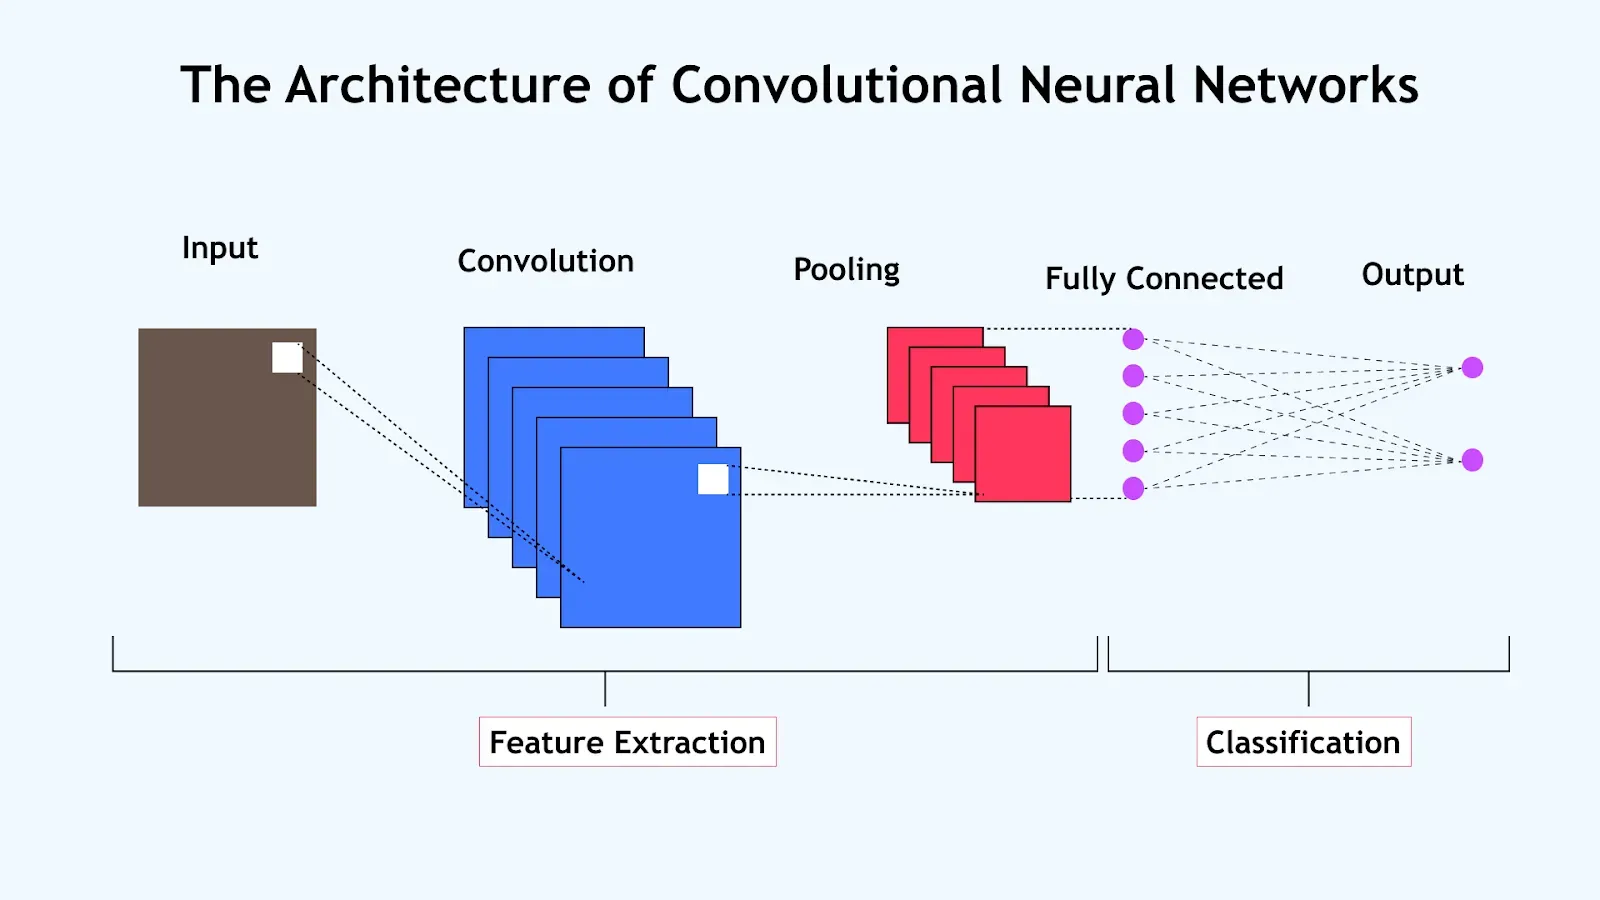

1.  **Input Layer**: This layer holds the raw pixel values of the image.
2.  **Convolutional Layer**: This is the core building block of a CNN. It applies a set of learnable filters (kernels) to the input image to create feature maps. Each filter detects a specific feature, such as edges, corners, or textures.
3.  **Activation Layer (e.g., ReLU)**: This layer applies a non-linear activation function to the output of the convolutional layer. The Rectified Linear Unit (ReLU) is a common choice, which introduces non-linearity and helps the network learn complex patterns.
4.  **Pooling Layer**: This layer reduces the spatial dimensions (width and height) of the feature maps, which helps to reduce the number of parameters and computational cost, as well as make the network more robust to small variations in the input. Max pooling and average pooling are common types.
5.  **Flatten Layer**: This layer takes the pooled feature maps and flattens them into a single vector. This vector is then fed into the fully connected layers.
6.  **Fully Connected Layer (Dense Layer)**: These are standard neural network layers where each neuron is connected to every neuron in the previous layer. They take the flattened feature vector as input and perform high-level reasoning.
7.  **Output Layer**: This layer produces the final output of the CNN. For classification tasks, this layer typically uses a softmax activation function to output a probability distribution over the classes.

These layers are often stacked in various combinations to build the CNN architecture. The specific arrangement and number of layers depend on the complexity of the task and the size of the dataset.

In [1]:
# Import Libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


Load the dataset



In [2]:
# load the data set
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# load the data set
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8940 - loss: 0.3358 - val_accuracy: 0.9848 - val_loss: 0.0487
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0470 - val_accuracy: 0.9873 - val_loss: 0.0405
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0316 - val_accuracy: 0.9868 - val_loss: 0.0417
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9914 - val_loss: 0.0286
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9921 - val_loss: 0.0278
313/313 - 1s - 2ms/step - accuracy: 0.9921 - loss: 0.0278

Test accuracy: 0.9921000003814697


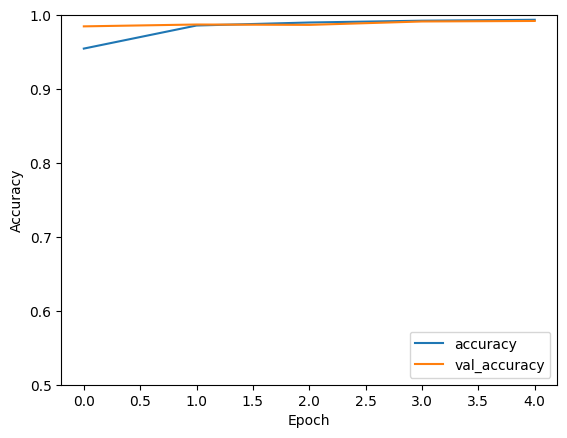

In [5]:
# Preprocess the data: Normalize pixel values to be between 0 and 1
# These two lines preprocess the image data. CNNs typically expect image data to have a channel dimension (e.g., 1 for grayscale, 3 for RGB).
# The reshape function adds this dimension.
# The pixel values are then converted to float32 and divided by 255 to normalize them to the range [0, 1]. This helps the training process.
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    # image size 32 and filter is 3*3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # 2nd Convutational layer +maxPooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

models.Sequential([...]): Creates a linear stack of layers.
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)): The first convolutional layer with 32 filters of size 3x3. activation='relu' applies the ReLU activation function. input_shape=(28, 28, 1) specifies the shape of the input images.
layers.MaxPooling2D((2, 2)): A max pooling layer that reduces the spatial dimensions by taking the maximum value over a 2x2 window.
layers.Conv2D(64, (3, 3), activation='relu'): The second convolutional layer with 64 filters.
layers.MaxPooling2D((2, 2)): Another max pooling layer.
layers.Conv2D(64, (3, 3), activation='relu'): The third convolutional layer with 64 filters.
layers.Flatten(): Flattens the output of the convolutional layers into a 1D vector to be fed into the dense layers.
layers.Dense(64, activation='relu'): A fully connected (dense) layer with 64 neurons and ReLU activation.
layers.Dense(10, activation='softmax'): The output layer with 10 neurons (one for each digit class) and a softmax activation function, which outputs a probability distribution over the classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


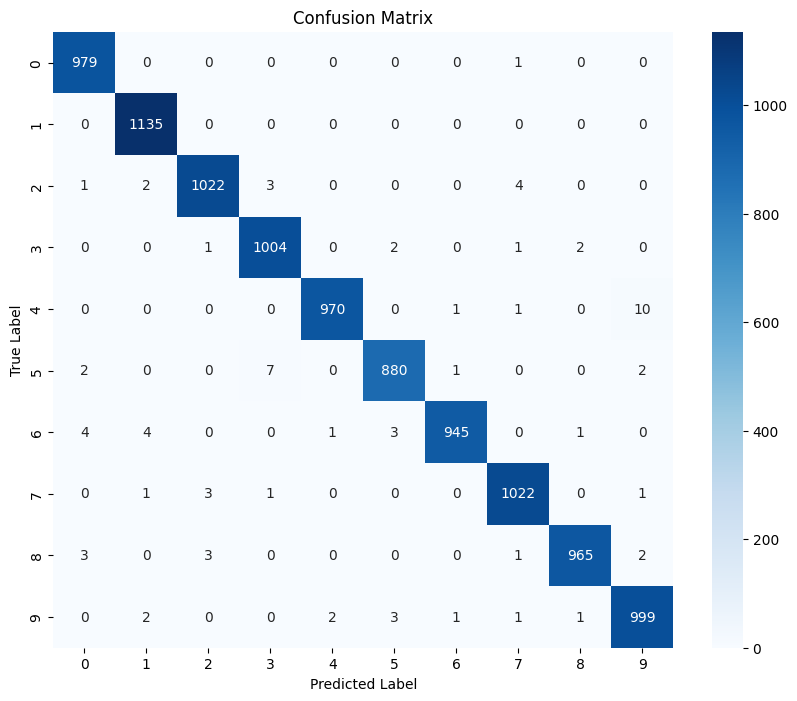

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the model's predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()